这里我们
来确认一下神经网络的学习步骤，顺便复习一下这些内容。神经网络的学习
步骤如下所示。
前提
神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的
过程称为“学习”。神经网络的学习分成下面4个步骤。

步骤1（mini-batch）

从训练数据中随机选出一部分数据，这部分数据称为mini-batch。我们
的目标是减小mini-batch的损失函数的值。

步骤2（计算梯度）

为了减小mini-batch的损失函数的值，需要求出各个权重参数的梯度。
梯度表示损失函数的值减小最多的方向。

步骤3（更新参数）

将权重参数沿梯度方向进行微小更新。

步骤4（重复）

重复步骤1、步骤2、步骤3。

In [36]:
import sys  
import numpy as np  
  
sys.path.append(r'F:\LIULANQIdownloads\【源代码】深度学习入门：基于Python的理论与实现_20240716')  
from common.functions import *  
from common.gradient import numerical_gradient  
  
class TwoLayerNet:  
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):  
        # 初始化权重  
        self.params = {}  
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)  
        self.params['b1'] = np.zeros(hidden_size)  
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)  
        self.params['b2'] = np.zeros(output_size)  
  
    def predict(self, x):  
        W1, W2 = self.params['W1'], self.params['W2']  
        b1, b2 = self.params['b1'], self.params['b2']  
        a1 = np.dot(x, W1) + b1  
        z1 = self.sigmoid(a1)  
        a2 = np.dot(z1, W2) + b2  
        y = softmax(a2)  
        return y  
  
    # x:输入数据, t:监督数据  
    def loss(self, x, t):  
        y = self.predict(x)  
        return cross_entropy_error(y, t)  
  
    def accuracy(self, x, t):  
        y = self.predict(x)  
        y = np.argmax(y, axis=1)  
        t = np.argmax(t, axis=1)  
        accuracy = np.sum(y == t) / float(x.shape[0])  
        return accuracy  
  
    # 此处注释掉了原有的 numerical_gradient 方法实现，因为已经有了新的 gradient 方法  
    '''  
    def numerical_gradient(self, x, t):  
        loss_W = lambda W: self.loss(x, t)  
        grads = {}  
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])  
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])  
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])  
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])  
        return grads  
    '''  
  
    def gradient(self, x, t):  
        # 前向传播  
        W1, W2 = self.params['W1'], self.params['W2']  
        b1, b2 = self.params['b1'], self.params['b2']  
        a1 = np.dot(x, W1) + b1  
        z1 = self.sigmoid(a1)  
        a2 = np.dot(z1, W2) + b2  
        y = softmax(a2)  
  
        # 反向传播  
        dy = (y - t) / t.shape[0]  # 交叉熵误差的导数  
        da2 = dy * (y * (1 - y))  # softmax函数的导数（注意：这里简化了，因为y已经是softmax的输出，但通常我们需要y的梯度相对于a2，即y * (1 - y)仅当y为单个样本时成立）  
        dW2 = np.dot(z1.T, da2)  
        db2 = np.sum(da2, axis=0)  
  
        dz1 = np.dot(da2, W2.T)  
        da1 = dz1 * z1 * (1 - z1)  # sigmoid函数的导数  
        dW1 = np.dot(x.T, da1)  
        db1 = np.sum(da1, axis=0)  
  
        grads = {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}  
        return grads  
  
    def sigmoid(self, x):  
        return 1 / (1 + np.exp(-x))  
  
    def sigmoid_grad(self, x):  
        return self.sigmoid(x) * (1 - self.sigmoid(x))
      

<>:4: SyntaxWarning: invalid escape sequence '\L'
<>:4: SyntaxWarning: invalid escape sequence '\L'
C:\Users\WMU\AppData\Local\Temp\ipykernel_29548\3302599908.py:4: SyntaxWarning: invalid escape sequence '\L'
  mnist_path = 'F:\LIULANQIdownloads\mnist.npz\mnist.npz'


Final loss: 2.1312267176093385


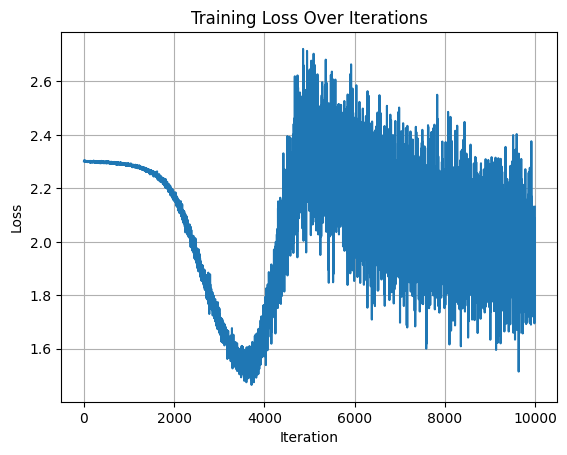

In [45]:
import numpy as np  
import matplotlib.pyplot as plt 
# 指定mnist.npz文件的路径  
mnist_path = 'F:\LIULANQIdownloads\mnist.npz\mnist.npz'  
  
# 加载mnist.npz文件  
mnist_data = np.load(mnist_path)  
  
# 通常mnist.npz文件包含训练集和测试集的图像和标签  
x_train, t_train = mnist_data['x_train'], mnist_data['y_train']  
x_test, t_test = mnist_data['x_test'], mnist_data['y_test']  
  
# 展平图像数据为一维数组  
x_train = x_train.reshape(-1, 28 * 28)  
x_test = x_test.reshape(-1, 28 * 28)  
  
# 归一化图像数据到0-1范围  
x_train = x_train.astype('float32') / 255.0  
x_test = x_test.astype('float32') / 255.0  
  
# 将标签转换为one-hot编码  
def one_hot_encode(labels, num_classes):  
    one_hot = np.zeros((labels.size, num_classes), dtype=np.int32)  
    one_hot[np.arange(labels.size), labels] = 1  
    return one_hot  
  
t_train = one_hot_encode(t_train, 10)  
t_test = one_hot_encode(t_test, 10)  
  
train_loss_list = []  
# 超参数  
iters_num = 10000
train_size = x_train.shape[0]  
batch_size = 1000  
learning_rate = 0.1  
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)  
  
for i in range(iters_num):  
    # 获取mini-batch  
    batch_mask = np.random.choice(train_size, batch_size)  
    x_batch = x_train[batch_mask]  
    t_batch = t_train[batch_mask]  
      
    # 计算梯度  
    grad = network.gradient(x_batch, t_batch)  
      
    # 更新参数  
    for key in ('W1', 'b1', 'W2', 'b2'):  
        network.params[key] -= learning_rate * grad[key]  
      
    # 记录学习过程  
    loss = network.loss(x_batch, t_batch)  
    train_loss_list.append(loss)  
  
# 打印最终损失  
print("Final loss:", train_loss_list[-1])
plt.plot(train_loss_list)  
plt.xlabel('Iteration')  
plt.ylabel('Loss')  
plt.title('Training Loss Over Iterations')  
plt.grid(True)  
plt.show()